# Quasi Monte Carlo integration of oscillatory functions on a $d$-simplex

## Analytical reference result

Consider the following integral,

$$
I_N(\{\alpha_1, \alpha_2, \ldots, \alpha_N\}) =
\int_0^1 dt_N \int_0^{t_N} dt_{N-1} \int_0^{t_{N-1}} dt_{N-2} \ldots \int_0^{t_2} dt_1
e^{\alpha_1 t_1 + \alpha_2 t_2 + \ldots + \alpha_N t_N}
$$
with $\Re(\alpha_i) > 0$ and $\Im(\alpha_i) > 0$.

By doing the $t_1$ integral, one can easily prove a recurrence relation
$$
I_N(\{\alpha_1,\alpha_2,\ldots,\alpha_N\}) = \frac{1}{\alpha_1}
\left[
I_{N-1}(\{\alpha_1+\alpha_2,\alpha_3,\ldots,\alpha_N\}) -
I_{N-1}(\{\alpha_2,\alpha_3,\ldots,\alpha_N\})
\right]
$$

with the initial value
$$
I_1(\{\alpha_1\}) = \int_0^1 dt_1 e^{\alpha_1 t_1} = \frac{e^{\alpha_1} - 1}{\alpha_1}.
$$

We can use this result as a reference for quasi Monte Carlo integration of oscillatory functions $\exp(\alpha_1 t_1 + \ldots + \alpha_N t_N)$ over a simplex.

In [1]:
function Iref(α::Vector)
    if length(α) > 1
        return (Iref(pushfirst!(α[3:end], α[1] + α[2])) - Iref(α[2:end])) / α[1]
    else
        return (exp(α[1]) - 1) / α[1]
    end
end

Iref (generic function with 1 method)

In [2]:
println(Iref([1.0]))
println(Iref([1.0, 2.0]))
println(Iref([1.0, 2.0, 3.0]))
println(Iref([1.0, 2.0, 3.0, 4.0]))

1.718281828459045
3.1673175915972305
8.676146890626935
40.88716161647638


## Transformations of the unit hypercube

<https://doi.org/10.1016/j.cam.2004.03.019>

In [3]:
# Sort
TransformSort(x::Vector{Float64}) = sort(x)

# Root
function TransformRoot(x::Vector{Float64})
    s = length(x)
    y = Vector{Float64}(undef, s)
    y[end] = x[end] ^ (1.0 / s)
    for i = s-1:-1:1
        y[i] = y[i+1] * (x[i] ^ (1.0 / i))
    end
    y
end

TransformRoot (generic function with 1 method)

## Quasi Monte Carlo integration

In [4]:
import PyCall; PyCall.pygui(:tk);
import PyPlot; const plt = PyPlot; plt.pygui(false); plt.svg(true);

In [7]:
import LinearAlgebra: dot
import Sobol: SobolSeq, next!

make_f(α::Vector) = x::Vector{Float64} -> exp(dot(α, x))

seq_dim(::SobolSeq{N}) where {N} = N

qMCIntegrate(f, seq, trans, N::Int) = sum(f(trans(next!(seq))) for n=1:N) / (N * factorial(seq_dim(seq)))

qMCIntegrate (generic function with 1 method)

## Visualization

In [10]:
function plot_diff(N_range, vals, ref)
    plt.plot(N_range, abs.((vals .- ref) / ref))
    plt.xlabel("\$N\$")
    plt.ylabel("Relative difference")
    plt.xscale("log")
    plt.yscale("log")
end

plot_diff (generic function with 1 method)

$d=2$

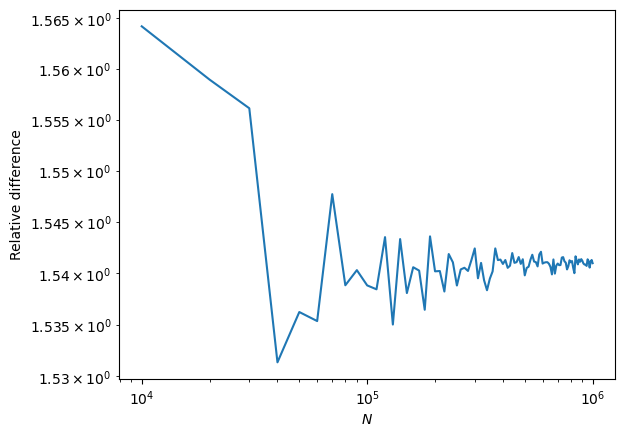

vals[end] = -0.004399444990970043 - 0.00532474449378605im
ref = -0.004405175238244365 + 0.005325288085325537im


-0.004405175238244365 + 0.005325288085325537im

In [21]:
α = [2π*2.2im + 0.1, 2π*2.4im + 0.2]
f = make_f(α)

ref = Iref(α)
vals = []
N_range = 10000:10000:1000000

for N = N_range
    append!(vals, qMCIntegrate(f, SobolSeq(length(α)), TransformRoot, N))
end

plot_diff(N_range, vals, ref)

@show vals[end]
@show ref

$d = 8$

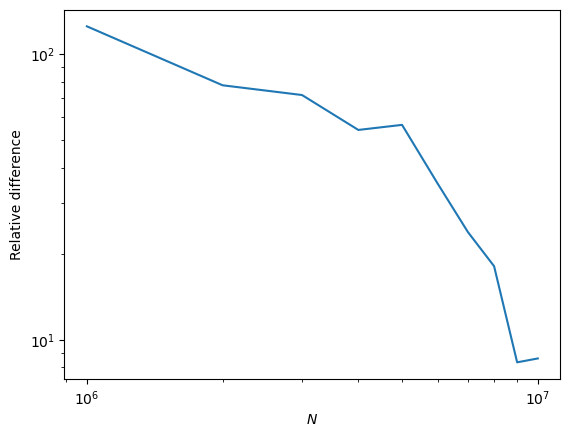

vals[end] = -1.2679486748887673e-8 + 1.1186941949222187e-8im
ref = 2.1204769270401938e-9 - 5.800498783387406e-10im


2.1204769270401938e-9 - 5.800498783387406e-10im

In [28]:
α = [2π*1.2im + 1,
     2π*1.4im - 1,
     2π*1.6im + 1,
     2π*1.8im - 1,
     2π*1.0im + 1,
     2π*1.2im - 1,
     2π*1.4im + 1]
f = make_f(α)

ref = Iref(α)
vals = []
N_range = 1000000:1000000:10000000

for N = N_range
    append!(vals, qMCIntegrate(f, SobolSeq(length(α)), TransformRoot, N))
end

plot_diff(N_range, vals, ref)

@show vals[end]
@show ref